In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from create_labels import *
import os

from dataset_generator import DatasetGenerator

In [2]:
image_type = 'PS-RGB'
img_path_prototype = f'./datasets/train/AOI_11_Rotterdam/{image_type}/SN6_Train_AOI_11_Rotterdam_{image_type}_'
summary = load_summary()
img_ids = list(set(summary['ImageId']))

In [3]:
dg = DatasetGenerator(img_ids, summary, img_path_prototype)
ot = (tf.float32, tf.int64)
os = (tf.TensorShape([256, 256, 3]), tf.TensorShape([900, 900]))
dataset = tf.data.Dataset.from_generator(dg, ot, os)

In [4]:
def show(image, label):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.imshow(image)
  ax2.imshow(label)

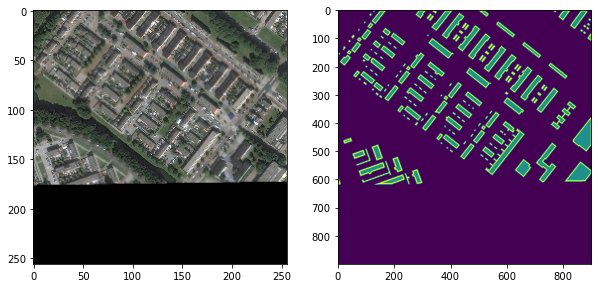

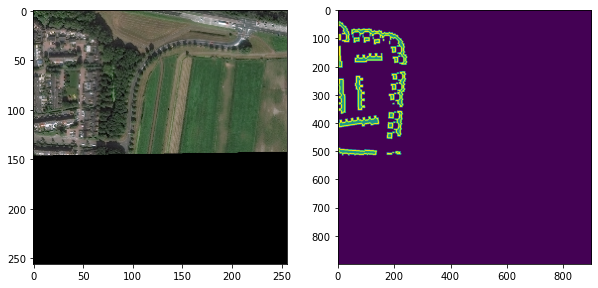

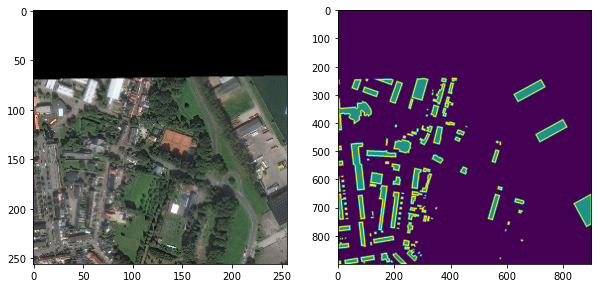

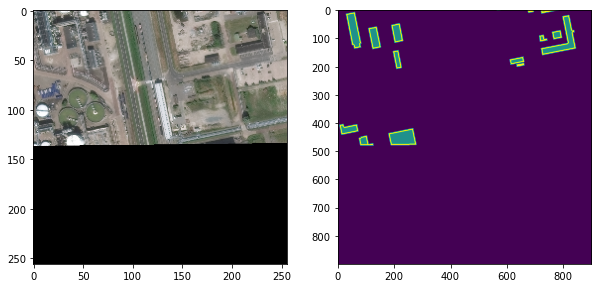

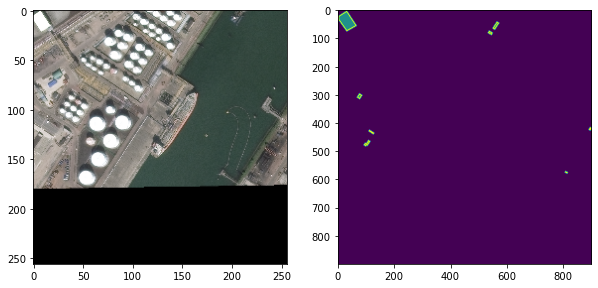

In [6]:
for image, label in dataset.take(5):
  show(image, label)

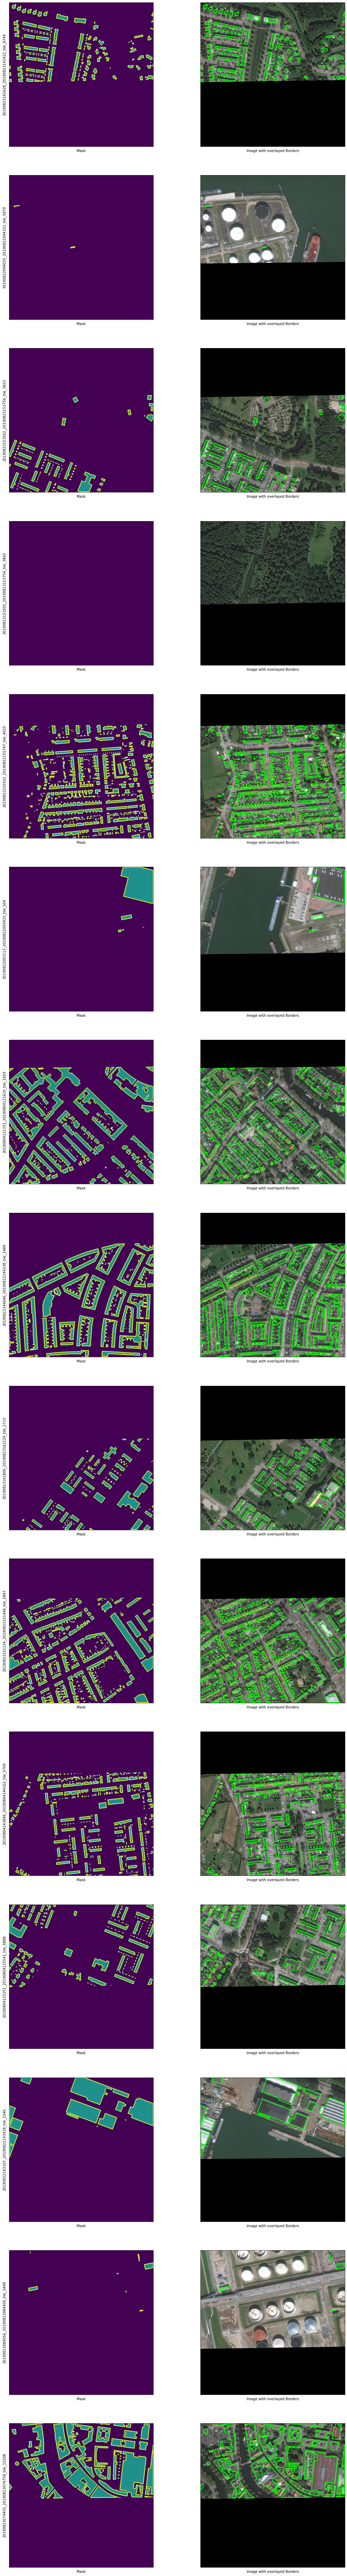

In [7]:

summary = load_summary()
list_ds = tf.data.Dataset.list_files('./datasets/train/AOI_11_Rotterdam/PS-RGB/*')

fig, axs = plt.subplots(15, 2, figsize=(18, 9*15))

for i, e in enumerate(list_ds.take(15)):
    id = e.numpy()[75:-4].decode("utf-8") 
    mask = mask_from_id(id, summary)
    axs[i, 0].imshow(mask)
    axs[i, 0].yaxis.set_ticks([])
    axs[i, 0].xaxis.set_ticks([])
    axs[i, 0].set_ylabel(id)
    axs[i, 0].set_xlabel('Mask')
    # overlay
    img = Image.open(e.numpy().decode("utf-8"))
    img1 = np.array(img)
    img1[mask == 2] = [0, 255, 0]
    axs[i, 1].imshow(img1)
    axs[i, 1].yaxis.set_ticks([])
    axs[i, 1].xaxis.set_ticks([])
    axs[i, 1].set_xlabel('Image with overlayed Borders')
